In [1]:
#1. Get a dataset of all Zählstellen
import json
import pandas as pd
import requests
import numpy as np


In [2]:
#read the data from the web
response = requests.get("https://iot.hamburg.de/v1.1/Datastreams?$filter=properties/serviceName eq 'HH_STA_AutomatisierteVerkehrsmengenerfassung' and properties/layerName eq 'Anzahl_Kfz_Zaehlstelle_1-Tag'&$top=500")

In [3]:
#Turn the JSON response in usable data
#Extract the data from the the response object
betterdata=response.json()
#only select the data, which are under the heading "value" and convert this to a pandas dataframe
test = betterdata["value"]
df = pd.DataFrame.from_dict(test)
df.head()

,@iot.id,@iot.selfLink,Observations@iot.navigationLink,ObservedProperty@iot.navigationLink,Sensor@iot.navigationLink,Thing@iot.navigationLink,description,name,observationType,observedArea,phenomenonTime,properties,resultTime,unitOfMeasurement
0,15720,https://iot.hamburg.de/v1.1/Datastreams(15720),https://iot.hamburg.de/v1.1/Datastreams(15720)...,https://iot.hamburg.de/v1.1/Datastreams(15720)...,https://iot.hamburg.de/v1.1/Datastreams(15720)...,https://iot.hamburg.de/v1.1/Datastreams(15720)...,Die Anzahl der von der Infrarotkamera erfasste...,Kfz-Aufkommen an Verkehrszählstelle 0201982 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [9.991158, 53...",2021-07-26T22:00:00.000Z/2021-08-11T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-07-28T01:46:26.885Z/2021-08-12T01:46:13.667Z,"{'name': 'Anzahl', 'symbol': None, 'definition..."
1,15724,https://iot.hamburg.de/v1.1/Datastreams(15724),https://iot.hamburg.de/v1.1/Datastreams(15724)...,https://iot.hamburg.de/v1.1/Datastreams(15724)...,https://iot.hamburg.de/v1.1/Datastreams(15724)...,https://iot.hamburg.de/v1.1/Datastreams(15724)...,Die Anzahl der von der Infrarotkamera erfasste...,Kfz-Aufkommen an Verkehrszählstelle 201980 im ...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [9.99116, 53....",2021-07-26T22:00:00.000Z/2021-08-11T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-07-28T01:46:26.959Z/2021-08-12T01:46:13.696Z,"{'name': 'Anzahl', 'symbol': None, 'definition..."
2,15728,https://iot.hamburg.de/v1.1/Datastreams(15728),https://iot.hamburg.de/v1.1/Datastreams(15728)...,https://iot.hamburg.de/v1.1/Datastreams(15728)...,https://iot.hamburg.de/v1.1/Datastreams(15728)...,https://iot.hamburg.de/v1.1/Datastreams(15728)...,Die Anzahl der von der Infrarotkamera erfasste...,Kfz-Aufkommen an Verkehrszählstelle 0201981 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [9.991162, 53...",2021-07-26T22:00:00.000Z/2021-08-11T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-07-28T01:46:31.373Z/2021-08-12T01:46:16.980Z,"{'name': 'Anzahl', 'symbol': None, 'definition..."
3,15808,https://iot.hamburg.de/v1.1/Datastreams(15808),https://iot.hamburg.de/v1.1/Datastreams(15808)...,https://iot.hamburg.de/v1.1/Datastreams(15808)...,https://iot.hamburg.de/v1.1/Datastreams(15808)...,https://iot.hamburg.de/v1.1/Datastreams(15808)...,Die Anzahl der von der Infrarotkamera erfasste...,Kfz-Aufkommen an Verkehrszählstelle 0216931 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [9.949614, 53...",2021-08-10T22:00:00.000Z/2021-08-11T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-08-12T01:47:21.810Z/2021-08-12T01:47:21.810Z,"{'name': 'Anzahl', 'symbol': None, 'definition..."
4,13616,https://iot.hamburg.de/v1.1/Datastreams(13616),https://iot.hamburg.de/v1.1/Datastreams(13616)...,https://iot.hamburg.de/v1.1/Datastreams(13616)...,https://iot.hamburg.de/v1.1/Datastreams(13616)...,https://iot.hamburg.de/v1.1/Datastreams(13616)...,Die Anzahl der von der Infrarotkamera erfasste...,Kfz-Aufkommen an Verkehrszählstelle 0311971 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.034157, 5...",2020-12-06T23:00:00.000Z/2021-08-11T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-02-02T13:21:36.627Z/2021-08-12T01:25:45.623Z,"{'name': 'Anzahl', 'symbol': None, 'definition..."


In [4]:
#2. Loop through the links of all "Zählstellen" to receive a dataset of the nr. of vehicles for every day/every "Zählstelle"

## generate links and append to df
df["links"] = df["Observations@iot.navigationLink"].apply(lambda x: x + "?$top=600")
df['id'] = df['@iot.id']

# clean dataframe where we dont find geo information
# 2 rows should be removed
print(f'Rows before NA removal: {len(df)}')
df = df.dropna()
print(f'Rows after NA removal: {len(df)}')
# extract the lat/long information to join later
df['long'] = df['observedArea'].apply(lambda x: x['coordinates'][0])
df['lat'] = df['observedArea'].apply(lambda x: x['coordinates'][1])

Rows before NA removal: 500
Rows after NA removal: 491


In [5]:
# create a list for the results
columns = ['@iot.id','phenomenonTime', 'result','resultTime']
missing_data = list()
df_complete = pd.DataFrame(columns = columns)

unique_links = df["links"].unique()

for link in unique_links:
    print(f'Retrieving data for {link}')
    response = requests.get(link)
    json = response.json()
    df_temp = pd.DataFrame.from_dict(json["value"])
    if set(columns).issubset(set(df_temp.columns)):
        df_temp = df_temp[columns]
        df_temp['id'] = link[40:45]
        df_complete = df_complete.append(df_temp,sort=False)
#        df_complete['id'] = df_complete['id'].astype('int64')
    else:
        # no data available
        print(f'---- WARNING: No data available or wrong columns selected for {link}')
        missing_data.append(link)
df_complete['id'] = df_complete['id'].astype('int64')
df_complete['result'] = df_complete['result'].astype('int64')

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15720)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15724)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15728)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15808)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13616)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13008)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13600)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13636)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15732)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15740)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13132)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13944)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13052)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13032)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13232)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13256)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13240)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13268)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13040)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13264)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14188)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13748)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14904)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13776)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14740)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14728)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14736)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14748)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14756)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14760)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13072)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14768)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13832)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13836)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14048)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14044)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13768)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13764)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14764)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13760)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13284)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13280)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13548)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14052)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13652)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14552)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14600)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13384)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13308)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13368)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13332)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13376)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14556)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13304)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14716)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(12952)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(12948)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13300)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13604)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14348)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13296)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14252)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14848)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14548)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13516)/Observations?$top=600
Retrieving data for h

In [7]:
missing_data

[]

In [8]:
len(df_complete)

120054

In [9]:
df_complete.head()

,@iot.id,phenomenonTime,result,resultTime,id
0,215424393,2021-08-04T22:00:00.000Z/2021-08-05T21:59:59.000Z,8020,2021-08-06T01:46:31.340Z,15720
1,215786447,2021-08-05T22:00:00.000Z/2021-08-06T21:59:59.000Z,7508,2021-08-07T01:45:46.628Z,15720
2,215927359,2021-08-06T22:00:00.000Z/2021-08-07T21:59:59.000Z,5215,2021-08-08T01:45:54.850Z,15720
3,216070505,2021-08-07T22:00:00.000Z/2021-08-08T21:59:59.000Z,3064,2021-08-09T01:44:53.021Z,15720
4,216256373,2021-08-08T22:00:00.000Z/2021-08-09T21:59:59.000Z,6913,2021-08-10T01:44:41.941Z,15720


In [10]:
df_raw = pd.merge(df_complete,df[['id','lat','long']], how='inner',on='id')
                        

In [11]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,215424393,2021-08-04T22:00:00.000Z/2021-08-05T21:59:59.000Z,8020,2021-08-06T01:46:31.340Z,15720,53.665946,9.991158
1,215786447,2021-08-05T22:00:00.000Z/2021-08-06T21:59:59.000Z,7508,2021-08-07T01:45:46.628Z,15720,53.665946,9.991158
2,215927359,2021-08-06T22:00:00.000Z/2021-08-07T21:59:59.000Z,5215,2021-08-08T01:45:54.850Z,15720,53.665946,9.991158
3,216070505,2021-08-07T22:00:00.000Z/2021-08-08T21:59:59.000Z,3064,2021-08-09T01:44:53.021Z,15720,53.665946,9.991158
4,216256373,2021-08-08T22:00:00.000Z/2021-08-09T21:59:59.000Z,6913,2021-08-10T01:44:41.941Z,15720,53.665946,9.991158


In [12]:
df_raw.loc[df_raw['id']!=13600]

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,215424393,2021-08-04T22:00:00.000Z/2021-08-05T21:59:59.000Z,8020,2021-08-06T01:46:31.340Z,15720,53.665946,9.991158
1,215786447,2021-08-05T22:00:00.000Z/2021-08-06T21:59:59.000Z,7508,2021-08-07T01:45:46.628Z,15720,53.665946,9.991158
2,215927359,2021-08-06T22:00:00.000Z/2021-08-07T21:59:59.000Z,5215,2021-08-08T01:45:54.850Z,15720,53.665946,9.991158
3,216070505,2021-08-07T22:00:00.000Z/2021-08-08T21:59:59.000Z,3064,2021-08-09T01:44:53.021Z,15720,53.665946,9.991158
4,216256373,2021-08-08T22:00:00.000Z/2021-08-09T21:59:59.000Z,6913,2021-08-10T01:44:41.941Z,15720,53.665946,9.991158
5,216451772,2021-08-09T22:00:00.000Z/2021-08-10T21:59:59.000Z,7136,2021-08-11T01:45:30.295Z,15720,53.665946,9.991158
6,216650827,2021-08-10T22:00:00.000Z/2021-08-11T21:59:59.000Z,7385,2021-08-12T01:46:13.667Z,15720,53.665946,9.991158
7,201603689,2021-07-26T22:00:00.000Z/2021-07-27T21:59:59.000Z,8774,2021-07-28T01:46:26.885Z,15720,53.665946,9.991158
8,203237348,2021-07-27T22:00:00.000Z/2021-07-28T21:59:59.000Z,8459,2021-07-29T01:47:34.083Z,15720,53.665946,9.991158
9,204920573,2021-07-28T22:00:00.000Z/2021-07-29T21:59:59.000Z,9131,2021-07-30T01:45:47.144Z,15720,53.665946,9.991158


## Debug section

In [ ]:
# only for debugging
columns_test = ['@iot.id','phenomenonTime', 'result','resultTime']
missing_data_test = list()
df_complete_test = pd.DataFrame(columns = columns_test)

# first link doesnt return data, second one works
unique_links_test = ['https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600',
                     'https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600']

for link in unique_links_test:
    print(f'Retrieving data for {link}')
    response = requests.get(link)
    json = response.json()
    df_temp_test = pd.DataFrame.from_dict(json["value"])
    if set(columns_test).issubset(set(df_temp_test.columns)):
        df_temp_test = df_temp_test[columns_test]
        df_temp_test['id'] = link[40:45]
        df_complete_test = df_complete_test.append(df_temp_test,sort=False)
        df_complete_test['id'] = df_temp_test['id'].astype('int64')
    else:
        # no data available
        print(f'---- WARNING: No data available or wrong columns selected for {link}')
        missing_data_test.append(link)


In [ ]:
df_raw_test = pd.merge(df_complete_test,df[['id','lat','long']], how='inner',on='id')
                        

In [ ]:
df_raw_test

Visualisierung - Patricia
1. Wochentage rausfinden und Durchschnitt über Wochentage legen

In [ ]:
weekday_list=[]

for i in df_raw['phenomenonTime']:
    t = i[25:35]
    day = pd.Timestamp(t)
    weekday = day.day_name()
    print(weekday)

weekday_list.append(weekday)



Meistens kann man die apply Funktion für solche Fälle nutzen, also wenn man für jeden Wert oder jede Reihe etwas anwenden will.
Konkret im unteren Beispiel wird `apply(lambda x: get_weekday(x))` für jeden Wert in `df_raw['phenomenonTime']` angewendet und `return weekday`. Das kann dann einfach in eine neue Spalte gespeichert werden (siehe df['weekday'], dieser Key muss vorher nicht existieren)

In [13]:
# Dein Code nur als Funktion
def get_weekday(input_date):
    t = input_date[25:35]
    day = pd.Timestamp(t)
    weekday = day.day_name()
    return weekday

In [ ]:
# lass das laufen und du siehst was der Output ist
# ich nutze df_raw_test, damit das etwas schneller ist
df_raw_test['phenomenonTime'].apply(lambda x: get_weekday(x))

## Debug Ende

In [15]:
# neue Spalte im Dataframe
df_raw['weekday'] = df_raw['phenomenonTime'].apply(lambda x: get_weekday(x))

In [16]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long,weekday
0,215424393,2021-08-04T22:00:00.000Z/2021-08-05T21:59:59.000Z,8020,2021-08-06T01:46:31.340Z,15720,53.665946,9.991158,Thursday
1,215786447,2021-08-05T22:00:00.000Z/2021-08-06T21:59:59.000Z,7508,2021-08-07T01:45:46.628Z,15720,53.665946,9.991158,Friday
2,215927359,2021-08-06T22:00:00.000Z/2021-08-07T21:59:59.000Z,5215,2021-08-08T01:45:54.850Z,15720,53.665946,9.991158,Saturday
3,216070505,2021-08-07T22:00:00.000Z/2021-08-08T21:59:59.000Z,3064,2021-08-09T01:44:53.021Z,15720,53.665946,9.991158,Sunday
4,216256373,2021-08-08T22:00:00.000Z/2021-08-09T21:59:59.000Z,6913,2021-08-10T01:44:41.941Z,15720,53.665946,9.991158,Monday


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

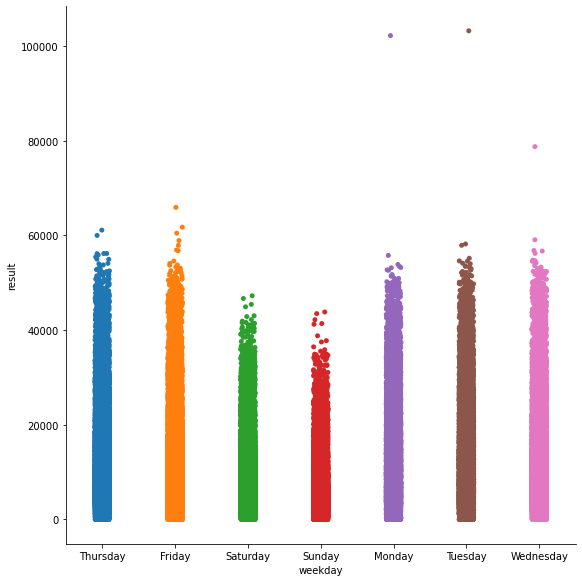

In [18]:
# Amount of cars per weekday
sns.catplot(x="weekday", y="result", data = df_raw, height=8)

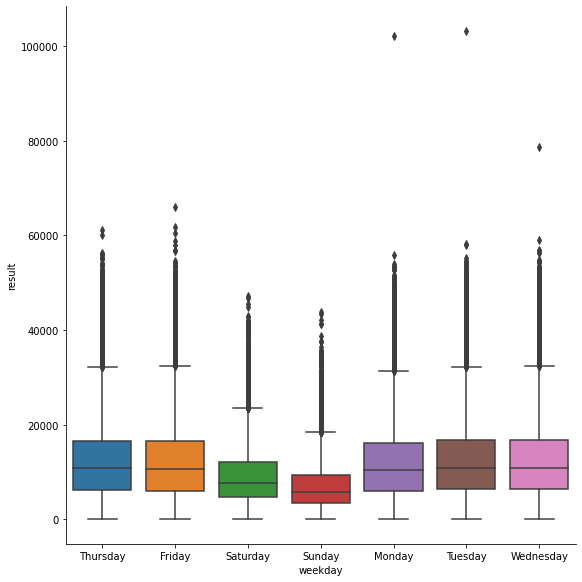

In [19]:
# Another way for visualiszation is using a boxplot. 
sns.catplot(x="weekday", y="result", kind="box", data=df_raw, height = 8)

In [20]:
# Calculating the average of each weekday
df_raw.groupby(['weekday']).mean()

,result,id,lat,long
weekday,,,,
Friday,12623.734699,13884.074780,53.573301,10.007366
Monday,12358.679916,13883.770471,53.573408,10.007327
Saturday,9283.345338,13883.888702,53.573342,10.007360
Sunday,7138.143074,13883.509962,53.573354,10.007362
Thursday,12751.989021,13884.672476,53.573323,10.007108
Tuesday,12869.185917,13884.363003,53.573376,10.007204
Wednesday,12931.583739,13886.448691,53.573482,10.007258


In [21]:
df_raw.dtypes

@iot.id            object
phenomenonTime     object
result              int64
resultTime         object
id                  int64
lat               float64
long              float64
weekday            object
dtype: object